# Dataviz and -analysis of Premier League GK stat 

In [16]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

## 1. Data preparation

Load in our data

In [5]:
#normal stats including save%, clean sheets and penalty saves
df_stats = pd.read_csv("data/epl_gk_stats.csv", index_col="Rk")

#advanced stats including crosses, goal kicks and passes
df_adv_stats = pd.read_csv("data/epl_gk_adv_stats.csv", index_col="Rk")

General information about dataset

In [6]:
#general information about our data set
#df_adv_stats.head()

### 1.1. Cleaning dataset

Fill empty cells

In [7]:
df_stats.isnull().sum()
df_stats.fillna(0.5, inplace=True)

Remove GK's with less than 600 minutes played

In [8]:
df_stats = df_stats.drop(df_stats[df_stats["Min"] < 600].index)

df_adv_stats = df_adv_stats.drop(df_adv_stats[df_adv_stats["90s"] < 7].index)

Remove double Player name

In [18]:
#clean player names
df_stats["Player"] = [name.split("\\")[0] for name in df_stats["Player"]]
df_adv_stats["Player"] = [name.split("\\")[0] for name in df_adv_stats["Player"]]

### 1.2. Calculating metrics

In [19]:
#saves per match
df_stats["Sv/90"] = df_stats["Saves"] / (df_stats["Min"]/90)

#saves per goal
df_stats["Sv/GA"] = df_stats["Saves"] / df_stats["GA"]

## 2. Data analysis

## GSAA and GSAE

#### GSAA

Calculate GSAA (Goals Saved Above Average)

In [21]:
#GSAA
#first we calculate how many saves an average GK would have saved if he faced the same amount of shots as our GK
df_stats["SvavgSv%"] = (df_stats["Save%"].mean()*df_stats["SoTA"])
#with SvavgSv% we can then calculate how many goals our team/GK would have let in if our GK performed as an average GK
df_stats["GAavgSv%"] = df_stats["SoTA"] - df_stats["SvavgSv%"]
#with GAavgSv% we can calculate how many more or less goals our GK have saved, that an average GK wouldn¨t had saved
df_stats["GSAA"] = df_stats["GAavgSv%"] - df_stats["GA"]

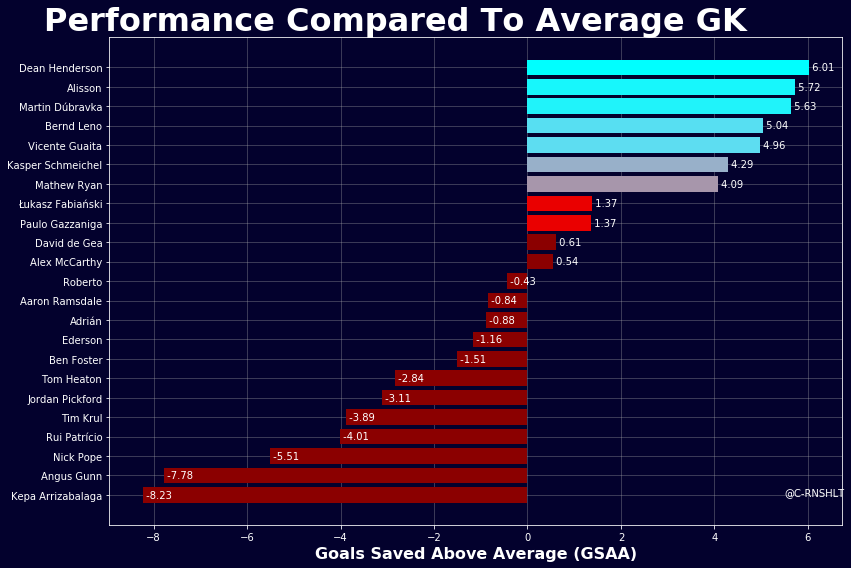

In [22]:
#sort 1st plot
x = df_stats.sort_values("GSAA")["Player"]
y = df_stats.sort_values("GSAA")["GSAA"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 6 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Goals Saved Above Average (GSAA)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Performance Compared To Average GK", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/EPL_GSAA_barh.png", dpi=300,facecolor="#03012d");

#### GSAE (oTxG - GA)
Jose Perez for inspiration

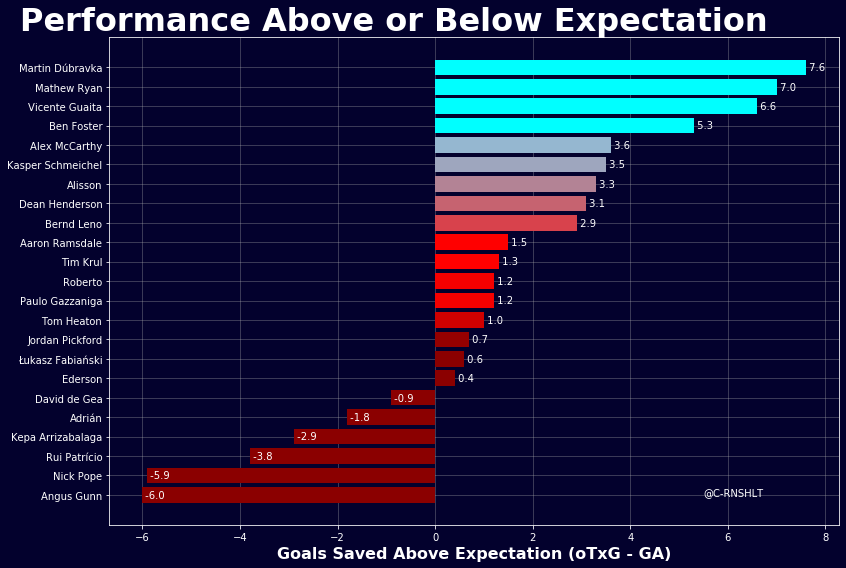

In [20]:
#sort 1st plot
x = df_adv_stats.sort_values("PSxG+/-")["Player"]
y = df_adv_stats.sort_values("PSxG+/-")["PSxG+/-"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 5 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Goals Saved Above Expectation (oTxG - GA)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Performance Above or Below Expectation", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/EPL_GSAE_barh.png", dpi=300,facecolor="#03012d");

## Claims (cross and outside PA actions) 

**Add basic barplot for claims metrics**

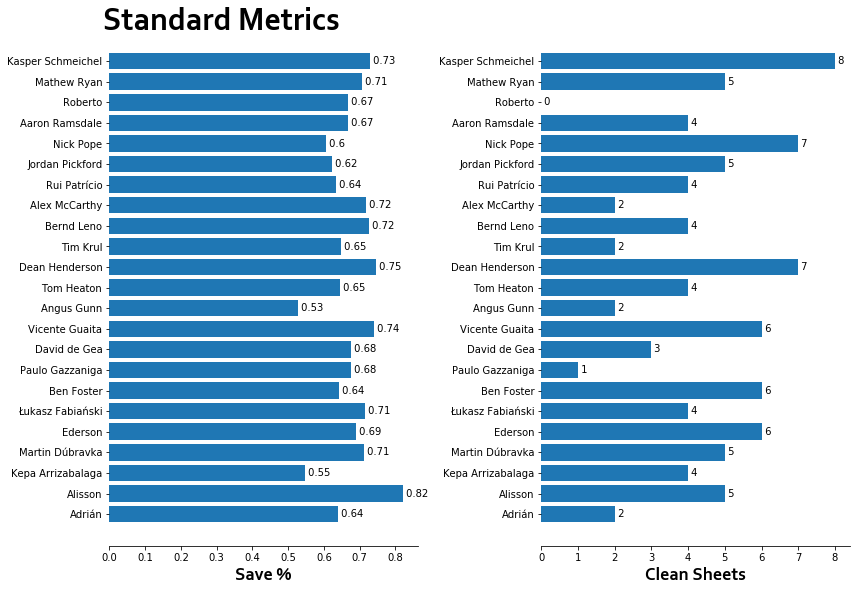

In [8]:
#sort Sv% values 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

#plot 1st subplot
ax1.barh(df_stats["Player"], df_stats["Save%"])
ax1.set_xlabel("Save %", fontsize=18, fontname="Corbel", fontweight="bold")

#plot 2nd subplot
ax2.barh(df_stats["Player"], df_stats["CS"])
ax2.set_xlabel("Clean Sheets", fontsize=18, fontname="Corbel", fontweight="bold")

#add text
fig.suptitle("Standard Metrics", x=0.26, y=1.02, fontsize=32, fontname="Corbel", fontweight="bold")

for i, value in enumerate(df_stats["Save%"]):
    ax1.text(value, i, " "+str(round(value, 2)), va="center")
for i, value in enumerate(df_stats["CS"]):
    ax2.text(value, i, " "+str(round(value, 2)), va="center")

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.tight_layout();

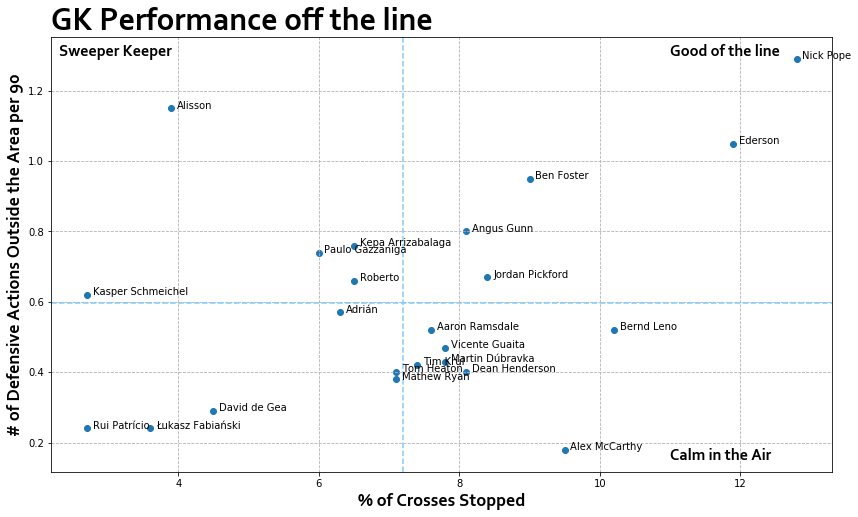

In [9]:
#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(df_adv_stats["Stp%"], df_adv_stats["#OPA/90"])

#add mean lines
ax.axvline(df_adv_stats["Stp%"].mean(), linestyle='--', color="#82cafc")
ax.axhline(df_adv_stats["#OPA/90"].mean(), linestyle='--', color="#82cafc")

#adding text
ax.set_xlabel("% of Crosses Stopped", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("# of Defensive Actions Outside the Area per 90", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_title("GK Performance off the line", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#add text/grid inside plot
ax.text(2.3, 1.3, "Sweeper Keeper", fontsize=16, fontname="Corbel", fontweight="bold")
ax.text(11, 0.15, "Calm in the Air", fontsize=16, fontname="Corbel", fontweight="bold")
ax.text(11, 1.3, "Good of the line", fontsize=16, fontname="Corbel", fontweight="bold")
ax.grid(linestyle="--")

#Create labels for each GK
for i, txt in enumerate(df_stats["Player"]):
    #uneccesary in this case, but can sort out GK with low save% (thus highliht good performers)
    #if df_stats["Save%"].iloc[i] > 0.5:
    ax.annotate(txt, xy = (df_adv_stats["Stp%"].iloc[i]+0.08, df_adv_stats["#OPA/90"].iloc[i])) 
                #txt is the text added, xy is coordinates of location


### 2.3. Distribution